W pierwszym kroku należy załadować obraz, zmienić go na grayscale, a potem zapisac do macierzy żeby zaczać wykonywać na nim operacje, oraz zaimportować wszystkie potrzebne biblioteki.

In [1]:
from helpers import *
import matplotlib.pyplot as plt

In [11]:
imgMatrix = load_image("img/Kropka.jpg")

Image loaded successfully


Następny etap to sinogram.
W następnym bloku będą też ustalane stałe detektorów.

In [12]:
alpha = 2
phi_range = 90
num_detectors = 180
num_iterations = 90

Transformata Radona.

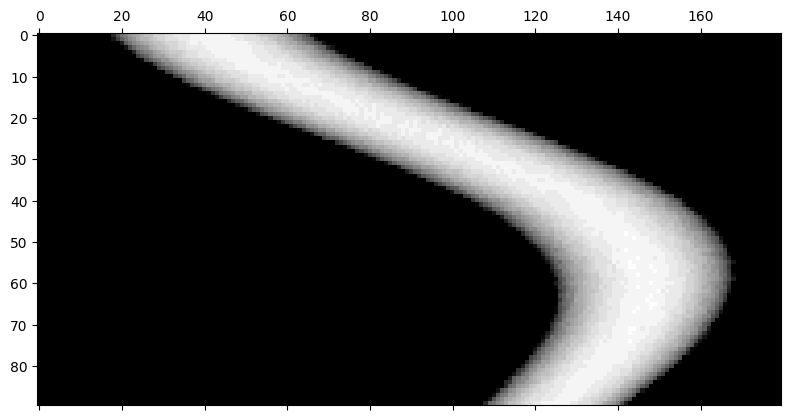

In [13]:
whole_sinogram = radon_transform(imgMatrix, alpha, phi_range, num_detectors, num_iterations)
plt.matshow(whole_sinogram, cmap=plt.cm.gray)
plt.show()

Poszczególne iteracje transformaty.

In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output

int_range_sinogram = widgets.IntSlider(min=1, max=num_iterations)
output1 = widgets.Output()
display(int_range_sinogram, output1)

def on_value_change_sinogram(change):
    with output1:
        sinogram = radon_transform(imgMatrix, alpha, phi_range, num_detectors, num_iterations=change['new'])
        clear_output(wait=True)
        plt.matshow(sinogram, cmap=plt.cm.gray)
        plt.show()

int_range_sinogram.observe(on_value_change_sinogram, names='value')

IntSlider(value=1, max=90, min=1)

Output()

Rekonstrukcja obrazu (backprojection).

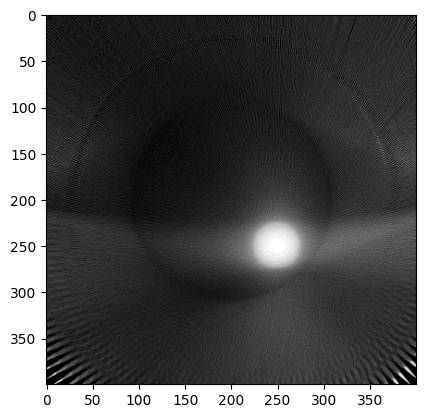

In [15]:
whole_reconstruction = backprojection(imgMatrix, whole_sinogram, alpha, phi_range, num_detectors, num_iterations)
plt.imshow(whole_reconstruction, cmap=plt.cm.gray)
plt.show()

Poszczególne iteracje backprojection.

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output

int_range_backprojection = widgets.IntSlider(min=1, max=num_iterations)
output2 = widgets.Output()
display(int_range_backprojection, output2)

def on_value_change_backprojection(change):
    with output2:
        recounstruction = backprojection(imgMatrix, whole_sinogram, alpha, phi_range, num_detectors, num_iterations=change['new'])
        clear_output(wait=True)
        plt.matshow(recounstruction, cmap=plt.cm.gray)
        plt.show()

int_range_backprojection.observe(on_value_change_backprojection, names='value')

IntSlider(value=1, max=90, min=1)

Output()

Zapis do pliku dicom oraz wpisanie podstawowych danych pacjenta jak i ścieżki gdzie zapisać plik.

In [17]:
patient_data = {"PatientName": "Sebastian",
               "PatientID": "123",
               "ImageComments": "lorem ipsum"}

save_path = "img-dicom/xyz.dcm"

In [18]:
save_as_dicom(save_path, whole_reconstruction, patient_data)

Saved successfully


Odczytywanie pliku dicom.


File path........: img-dicom/xyz.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient's Name...: Sebastian, 
Patient ID.......: 123
Modality.........: CT
ImageComments....: lorem ipsum
Image size.......: 400 x 400


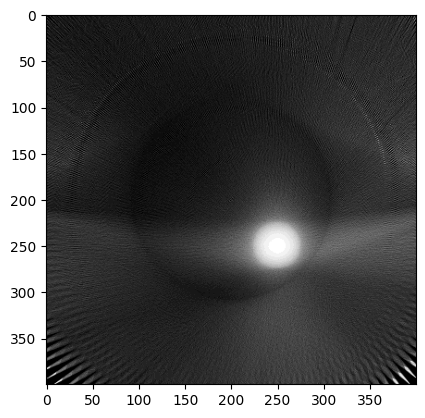

In [19]:
read_from_dicom("img-dicom/xyz.dcm")